# In Data Analysis:

- Missing values.
- Explore About the Numerical Variables
- Explore About categorical Variables
- Finding Relationship b/w feactures

# <span style="color: blue;"> ZOMATO DATASET </span>

Zomato API Analysis is a valuable tool for food enthusiasts who want to explore the world of food and discover the best cuisines in their budget from various parts of the world. This analysis is also beneficial for those seeking value for money restaurants in different regions for specific cuisines. Furthermore, this analysis provides insights into the best cuisine of a country and the locality with the highest number of restaurants serving that cuisine. To use the Zomato API, developers can obtain an API key by registering on the Zomato API developer portal. With this key, developers can access the API's endpoints to obtain information on restaurants, cafes, and bars, including user reviews, ratings, menus, and pricing information.

- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant
- Country Code: Country in which restaurant is located
- City: City in which restaurant is located
- Address: Address of the restaurant
- Locality: Location in the city
- Locality Verbose: Detailed description of the locality
- Longitude: Longitude coordinate of the restaurant's location
- Latitude: Latitude coordinate of the restaurant's location
- Cuisines: Cuisines offered by the restaurant
- Average Cost for two: Cost for two people in different currencies 👫
- Currency: Currency of the country
- Has Table booking: yes/no
- Has Online delivery: yes/ no
- Is delivering: yes/ no
- Switch to order menu: yes/no
- Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings casted by people

### Importing the Libraries

In [1]:
### Importing the Librariesimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

### Load Data1

In [2]:
df=pd.read_csv('zomato.csv', encoding='latin-1')

<IPython.core.display.Javascript object>

### How data looks?

In [3]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

### How big data is?

In [4]:
df.shape

(9551, 21)

### Different columns present.

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

## Missing Data
#### Let's begin some exploratory data analysis! We'll start by checking out missing data!

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<AxesSubplot: >

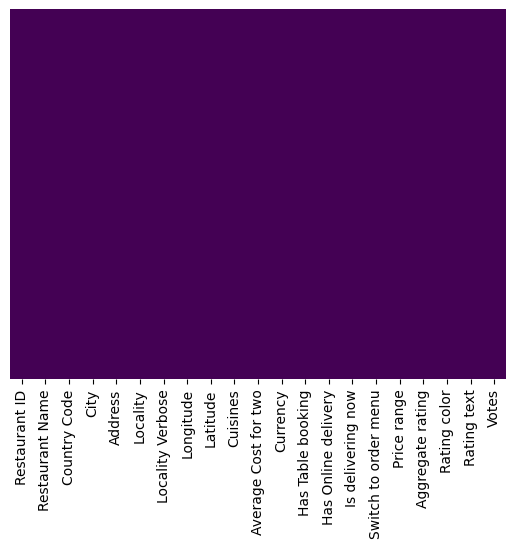

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Here we will check the percentage of nan values present in each feature.
#### Step1: make the list of features which has missing values

In [8]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

#### Step2- print the feature name and the percentage of missing values

In [9]:
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  '% missing values')

Cuisines 0.0009 % missing values


##### Cuisines column: 0.0009% missing values
The percentage of missing values in the Cuisines column is very low (less than 0.0009%).
One option to handle the missing values in this column is to impute them with the most common value (i.e., the mode) of the Cuisines column, since this is a categorical variable. 

In [10]:
# Fill missing values in the Cuisines column with the most common value
most_common_cuisines = df['Cuisines'].value_counts().idxmax()
df['Cuisines'].fillna(most_common_cuisines, inplace=True)

### Load Data2

In [11]:
df_country=pd.read_excel('Country-code.xlsx')
df_country.head()

<IPython.core.display.Javascript object>

Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia

### Merge Datasets

In [12]:
final_df=pd.merge(df,df_country,on='Country Code',how='left')
final_df.head(2)

<IPython.core.display.Javascript object>

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  ...  Has Table booking Has Online delivery  \
0  French, Japanese, Desserts  ...                Yes                  No   
1                    Japanese  ...                Yes                  No   

  Is delivering now Switch to order menu Price range Aggregate rating  \
0                No                   No           3              4.8   
1                No                   No           3              4.5   

   Rating color  Rating text Votes      Country  
0    Dark Green    Excellent   314  Phillipines  
1    Dark Green    Excellent   591  Phillipines  

[2 rows x 22 columns]

### Grouping the dataframe by country code and extracting the country name.

In [13]:
country_df = final_df.groupby('Country Code')['Country'].unique().apply(lambda x: x[0]).reset_index()
country_df

Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States

## Let's continue on by visualizing some more of the data!

### Uniques value per column

In [14]:
# To find the unique value
# final_df.nunique()

/var/folders/h7/7nd2ltg17s3g53n9rt_q0s6c0000gn/T/ipykernel_83401/1313594259.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(unique_counts.index, ha='center', rotation=90)


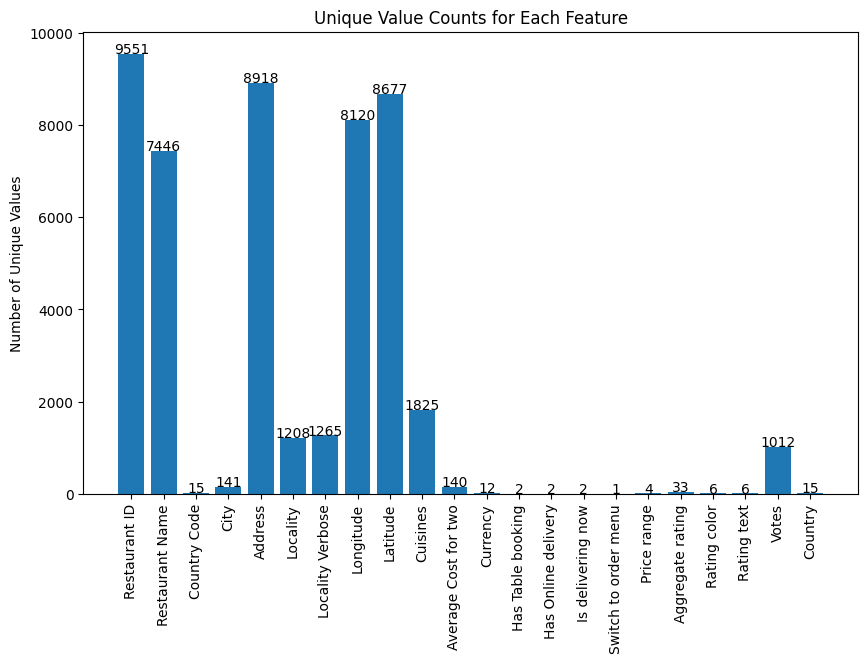

In [15]:
unique_counts = final_df.nunique()

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(unique_counts.index, unique_counts.values)

for i, v in enumerate(unique_counts.values):
    ax.text(i, v+10, str(v), ha='center')

ax.set_xticklabels(unique_counts.index, ha='center', rotation=90)
ax.set_ylabel('Number of Unique Values')
ax.set_title('Unique Value Counts for Each Feature')
plt.show()

#### Observation: 
 - We can delete the Restaurant ID column because it has a unique value for each row.
 - Currency: This column may not be directly useful for machine learning, as it simply specifies the currency used for the Average Cost for two column.
 - Switch to order menu: This column is not useful for machine learning, as it simply provides a hyperlink to the online menu for a restaurant.

### Droping the following column:
- Restaurant ID
- Currency
- Switch to order menu

In [16]:
final_df.drop(['Restaurant ID', 'Currency', 'Switch to order menu'], axis=1, inplace=True)

### Number of Restaurant  per country

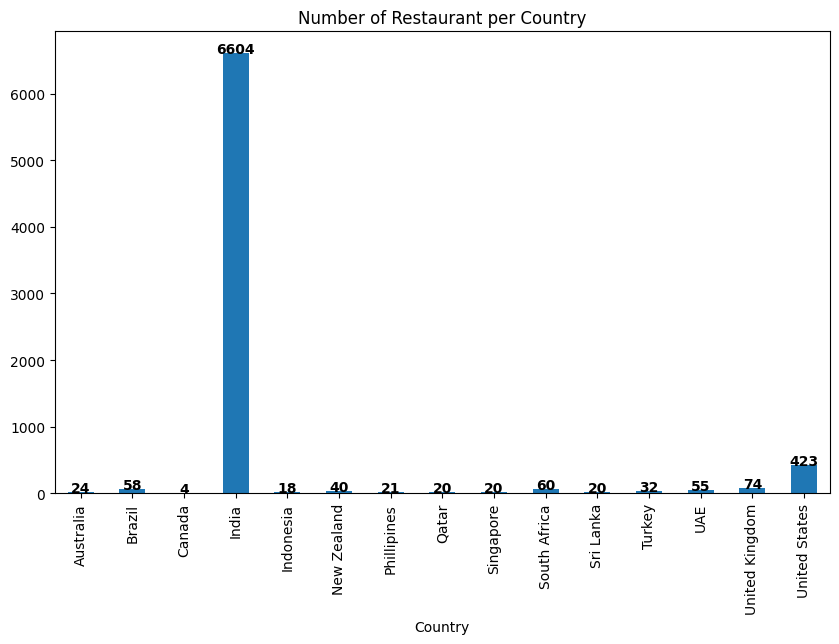

In [17]:
restaurant_count = final_df.groupby('Country')['Restaurant Name'].nunique()
ax = restaurant_count.plot(kind='bar', figsize=(10, 6))
ax.set_title('Number of Restaurant per Country')

# Add count values on top of the bars
for i, v in enumerate(restaurant_count.values):
    ax.text(i, v+0.5, str(v), ha='center', fontweight='bold')
    
plt.show()

Observation:
- We have data of total 15 country.
- India have higest number of restraunt linked with Zomato.
- Canada have the lowest.

### Number of Cities per Country in Zomato Dataset

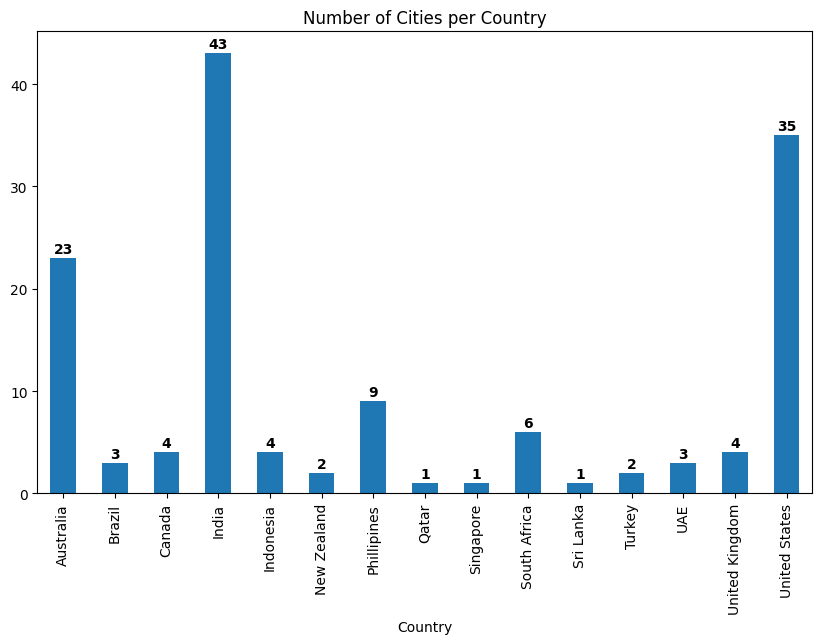

In [18]:
city_count = final_df.groupby('Country')['City'].nunique()
ax = city_count.plot(kind='bar', figsize=(10, 6))
ax.set_title('Number of Cities per Country')

# Add count values on top of the bars
for i, v in enumerate(city_count.values):
    ax.text(i, v+0.5, str(v), ha='center', fontweight='bold')
    
plt.show()

### Restraunt with Aggregate rating more than 4.5

In [19]:
!pip install folium

In [20]:
df_filtered = final_df.loc[final_df['Aggregate rating'] > 4.5, ['Restaurant Name', 'Latitude', 'Longitude', 'Aggregate rating']]

In [21]:
import folium

# Create a map object
world_map = folium.Map()

# Add a marker for each cuisine location
for index, row in df_filtered.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    name = row['Restaurant Name']
    popup_text = f"{name}"
    marker = folium.Marker(location=[lat, lon], popup=popup_text)
    marker.add_to(world_map)

# Display the map
world_map

### Has Table booking

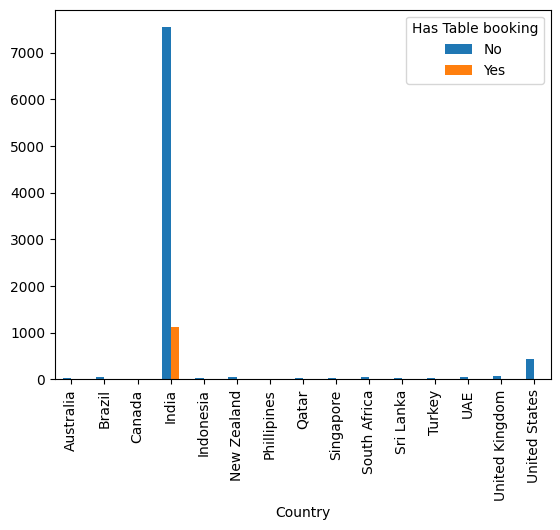

In [22]:
#### Group by column 'Country' and count the values in column 'Has Table booking '
has_table_booking = final_df.groupby('Country')['Has Table booking'].value_counts().unstack().fillna(0)
has_table_booking.plot(kind='bar')
plt.show()

Observation:
- Six Country have Table booking option.
- India have in 1111 Restraunt')

###  Has Online delivery

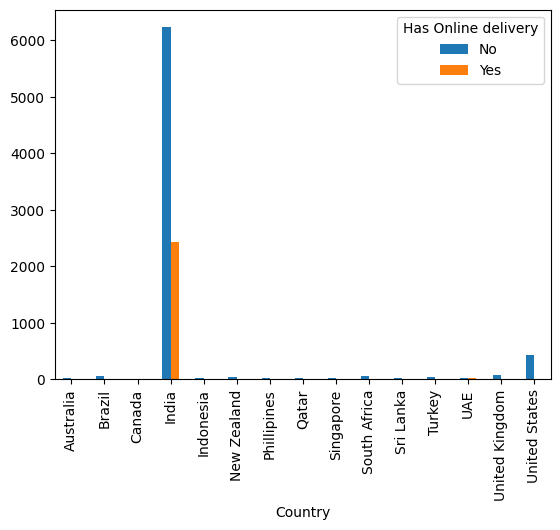

In [23]:
has_online_delivery = final_df.groupby('Country')['Has Online delivery'].value_counts().unstack().fillna(0)
has_online_delivery.plot(kind='bar')
plt.show()

Observation:
- Only two Country have online dileviry system:
- India
- UAE')

###  Is delivering now

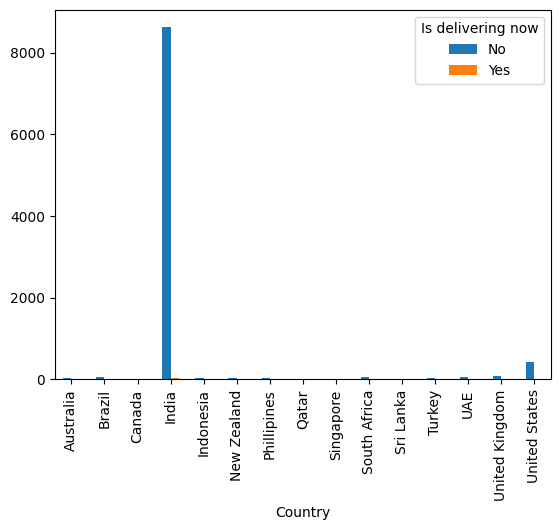

In [24]:
is_delivering_now = final_df.groupby('Country')['Is delivering now'].value_counts().unstack().fillna(0)
is_delivering_now.plot(kind='bar')
plt.show()

Observation: 
    - 34 Restraunt in India have delivering option.

### Price range of the Restraunt

Price range is a feature in the Zomato dataset that indicates the price level of a restaurant. It is a numerical value from 1 to 4, where 1 means the restaurant is cheap and 4 means it is expensive. The value is determined based on the average cost for two people to eat at the restaurant. Here's how the values for price range are typically defined:

1 - Below 500 rupees</br>
2 - 500 to 1000 rupees</br>
3 - 1000 to 1500 rupees</br>
4 - Above 1500 rupees

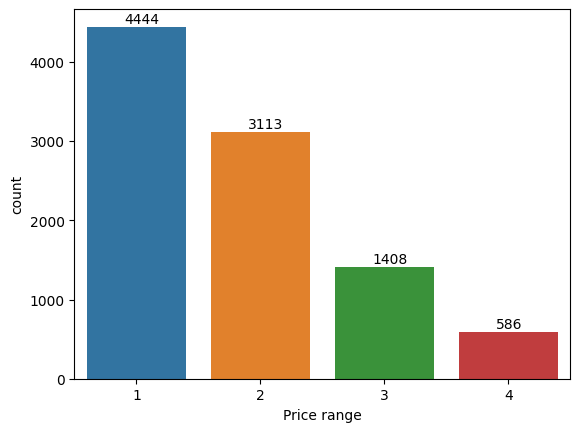

In [25]:
# Create the countplot
ax = sns.countplot(x='Price range', data=final_df)

# Add counts on the bars
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+50))

# Show the plot
plt.show()

In [26]:
from plotly.offline import init_notebook_mode, plot, iplot

labels = list(final_df.Country.value_counts().index)
values = list(final_df.Country.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}
iplot(fig)

Observation
- Maximum trascation happening is from India, followed by USA then UK

In [27]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

Aggregate rating Rating color Rating text  Rating Count
0                0.0        White   Not rated          2148
1                1.8          Red        Poor             1
2                1.9          Red        Poor             2
3                2.0          Red        Poor             7
4                2.1          Red        Poor            15
5                2.2          Red        Poor            27
6                2.3          Red        Poor            47
7                2.4          Red        Poor            87
8                2.5       Orange     Average           110
9                2.6       Orange     Average           191
10               2.7       Orange     Average           250
11               2.8       Orange     Average           315
12               2.9       Orange     Average           381
13               3.0       Orange     Average           468
14               3.1       Orange     Average           519
15               3.2       Orange     Average           522
16               3.3       Orange     Average           483
17               3.4       Orange     Average           498
18               3.5       Yellow        Good           480
19               3.6       Yellow        Good           458
20               3.7       Yellow        Good           427
21               3.8       Yellow        Good           400
22               3.9       Yellow        Good           335
23               4.0        Green   Very Good           266
24               4.1        Green   Very Good           274
25               4.2        Green   Very Good           221
26               4.3        Green   Very Good           174
27               4.4        Green   Very Good           144
28               4.5   Dark Green   Excellent            95
29               4.6   Dark Green   Excellent            78
30               4.7   Dark Green   Excellent            42
31               4.8   Dark Green   Excellent            25
32               4.9   Dark Green   Excellent            61

From the above information we can conclude the following:

Rating 0 - White - Not rated

Rating 1.8 to 2.4 - Red  -----------> Poor

Rating 2.5 to 3.4 - Orange  --------> Average

Rating 3.5 to 3.9 - Yellow  ---------> Good

Rating 4.0 to 4.4 - Green ---------> Very Good

Rating 4.5 to 4.9 - Dark Green  ---> Excellent

Now we plot a bar graph to understand the spread of ratings across restaurants.

<AxesSubplot: title={'center': 'Count of Restaurants by Rating Color'}, xlabel='Rating color', ylabel='Rating Count'>

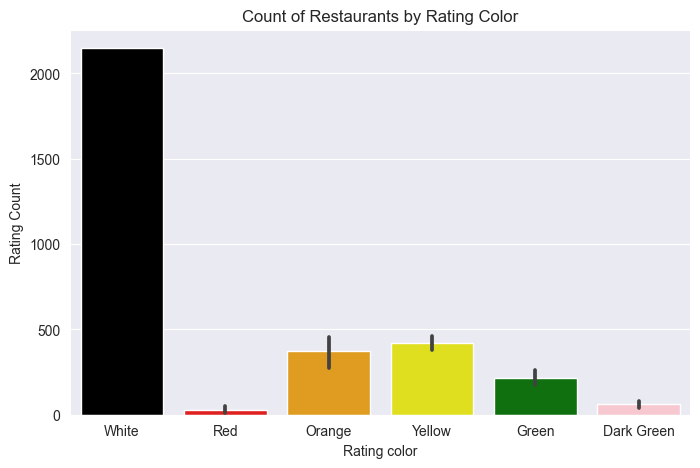

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
plt.title('Count of Restaurants by Rating Color')
colors = {'Green': 'green', 'Yellow': 'yellow', 'Orange': 'orange', 'White': 'black', 'Red': 'red', 'Dark Green': 'pink'}
sns.barplot(x=ratings['Rating color'], y=ratings['Rating Count'], palette=colors)

Observation 
- Maximum restaurants have no rating.

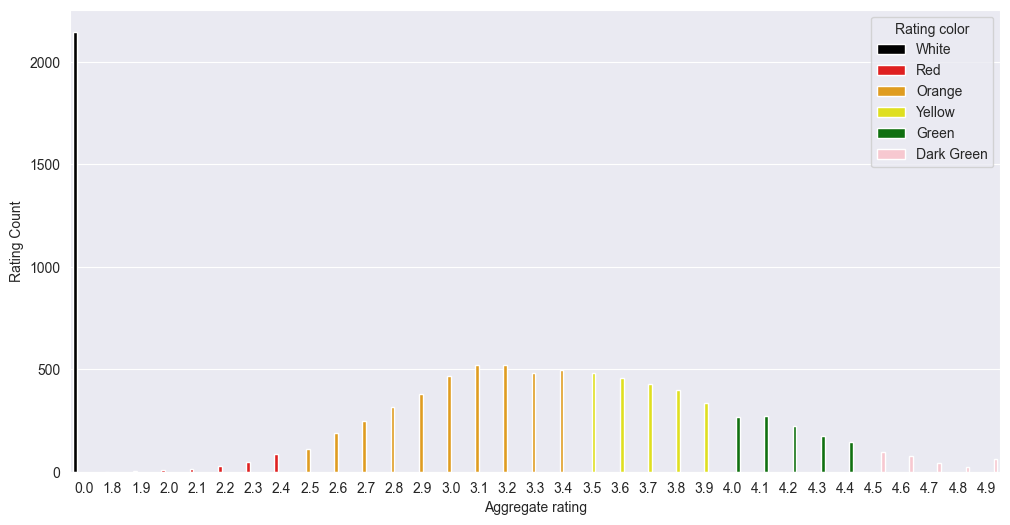

In [29]:
import matplotlib
plt.figure(figsize=(12,6));
colors = {'Green': 'green', 'Yellow': 'yellow', 'Orange': 'orange', 'White': 'black', 'Red': 'red', 'Dark Green': 'pink'}
sns.barplot(x='Aggregate rating', y='Rating Count',hue='Rating color',data=ratings,palette=colors)
plt.show()

Observation: 
1. Not rated count is high.
2. Maximum rating us b/w 2.9 - 3.9.

#### Drop the "Rating color" and "Rating text" columns as they are redundant and their information is already conveyed through the "Aggregate rating" column.

In [30]:
final_df.drop(['Rating color', 'Rating text'], axis=1, inplace=True)

### Country with no Rating

In [31]:
No_rating = final_df[final_df['Aggregate rating']==0].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
print('We observe that India seems to have the maximum number of unrated restaurants.')
No_rating

We observe that India seems to have the maximum number of unrated restaurants.


Country  Rating Count
0          Brazil             5
1           India          2139
2  United Kingdom             1
3   United States             3

### Pie Chart : Top 3 City using Zomato

In [32]:
city_names=final_df.City.value_counts().index

In [33]:
city_val=final_df.City.value_counts().values

([<matplotlib.patches.Wedge at 0x7fc248b99eb0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029922, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289048, '0.31%')])

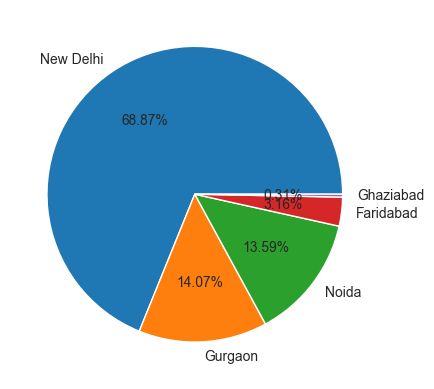

In [34]:
plt.pie(city_val[:5],labels=city_names[:5],autopct="%1.2f%%")

In [35]:
final_df['Cuisines'].value_counts().head(10)

North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

### Let's know about data types

In [36]:
final_df.dtypes

Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Price range               int64
Aggregate rating        float64
Votes                     int64
Country                  object
dtype: object

The columns 
- "Has Table booking",
- "Has Online delivery",
- "Is delivering now" 
are currently of object type (i.e., strings), but they may need to be converted to numeric format (e.g., 0 or 1) for some machine learning algorithms to work.

In [37]:
final_df['Has Table booking'] = final_df['Has Table booking'].map({'Yes': 1, 'No': 0})
final_df['Has Online delivery'] = final_df['Has Online delivery'].map({'Yes': 1, 'No': 0})
final_df['Is delivering now'] = final_df['Is delivering now'].map({'Yes': 1, 'No': 0})

### Correlation matrix

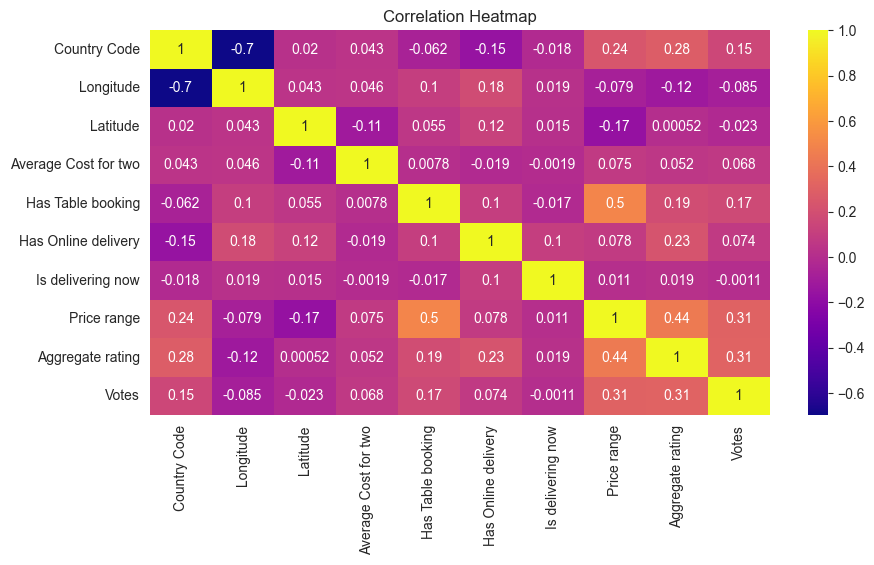

In [38]:
plt.figure(figsize=(10, 5))
sns.heatmap(final_df.corr(), annot=True, cmap='plasma')
plt.title('Correlation Heatmap')
plt.show()